#Grade Prediction Project


##Imports and the preliminary data frame

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MP2_Data.csv to MP2_Data (7).csv


In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#test data imports
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
#KNN imports
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
#Random Forest imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline


In [ ]:
df_course_unfiltered = pd.read_csv('MP2_Data.csv')
#drop student id
df_course_unfiltered = df_course_unfiltered.drop(df_course_unfiltered.columns[0], axis=1)
df_course_unfiltered.head()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,...,0,5,4,0,4,8,6,1,0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,...,8,5,2,0,0,25,3,2,5,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,...,0,8,2,0,0,9,0,1,0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,...,4,10,0,0,0,7,6,0,0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,...,6,8,5,1,1,5,3,1,0,2


###Column averages for Stats

In order to make this data frame more managable, I will take an average on all Stats columns of each type 0-3.

In [ ]:
df_course_avg_stats = df_course_unfiltered.copy()

#the average of each status for every week for each row
for i in range(0,4):
  #find the Week[1-9]_Stat{i} and count the average the column for each row
  #df_course_unfiltered.drop(columns=df_course_unfiltered.filter(regex=f'Week[1-9]_Stat{i}').columns)
  df_course_avg_stats[f'Avg_Stat{i}'] = df_course_avg_stats.filter(regex=f'Week[1-9]_Stat{i}').mean(axis=1)

#df_course_avg_stats.head()

#drop columns for each week
for i in range(0,4):
  #drop columns
  df_course_avg_stats = df_course_avg_stats.drop(columns=df_course_avg_stats.filter(regex=f'Week[1-9]_Stat{i}').columns)

df_course_avg_stats.head()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Grade,Avg_Stat0,Avg_Stat1,Avg_Stat2,Avg_Stat3
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,4,13.111111,13.222222,0.888889,0.444444
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,4,51.666667,9.444444,1.888889,4.111111
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,3,18.777778,7.222222,0.888889,1.000000
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,3,61.444444,8.222222,1.888889,1.666667
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,2,16.555556,6.888889,0.777778,1.888889


##Correlation Analysis

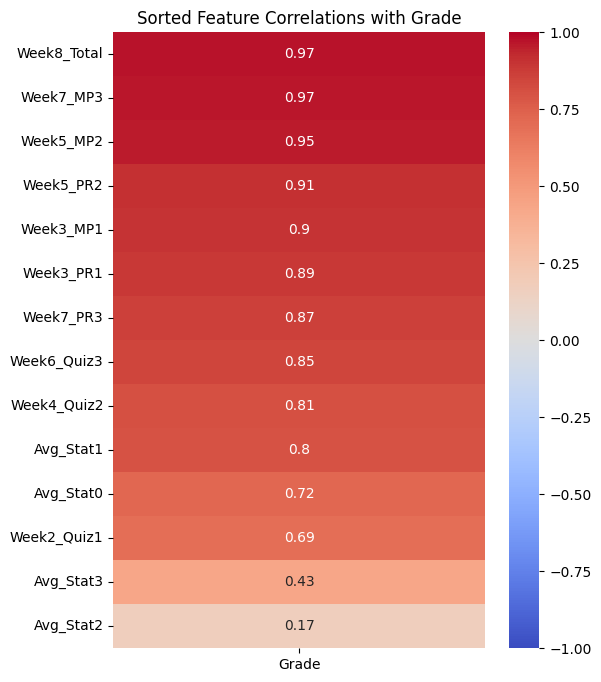

In [ ]:
#Pearson corr
correlation_matrix = df_course_avg_stats.corr()

#sort the column
grade_correlation_avg_column = correlation_matrix[['Grade']].drop('Grade').sort_values(by='Grade', ascending=False)

# plot
plt.figure(figsize=(6, 8))
sns.heatmap(grade_correlation_avg_column, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Sorted Feature Correlations with Grade")
plt.show()

As we can see, the mini-projects are highly correlated with the grade. The column Week8_Total is also highly correlated, but since it translates to the grade in the context of the course, we'll remove it from the final data frame.

I wish to note that I have previously experimented with keeping Avg_Stat0 and Avg_Stat1 in the models, but it hurt the performance of the models. I have thus decided not to keep them, since they are not well-defined in the context of the course. We cannot for example pinpoint if they are cumulated from finishing a lecture video or pausing etc.

I also experimented with calculating the average for the quizzes and mini-projects, to limit dimensionality, but it also hurt the performance of the models.

In [ ]:
##Final data frame df_course
df_course = df_course_avg_stats.drop(columns=['Week8_Total', 'Avg_Stat0', 'Avg_Stat1', 'Avg_Stat2', 'Avg_Stat3'])

#place Grade as last column
cols = list(df_course.columns)
cols.insert(len(cols)-1, cols.pop(cols.index('Grade')))
df_course = df_course.loc[:, cols]

df_course.head()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,2


##EDA

It is worthy to note that not a single student has the grade 1 in this course data. Thus, we cannot train the model to predict the grade 1. The grade 2 is also not well represented.

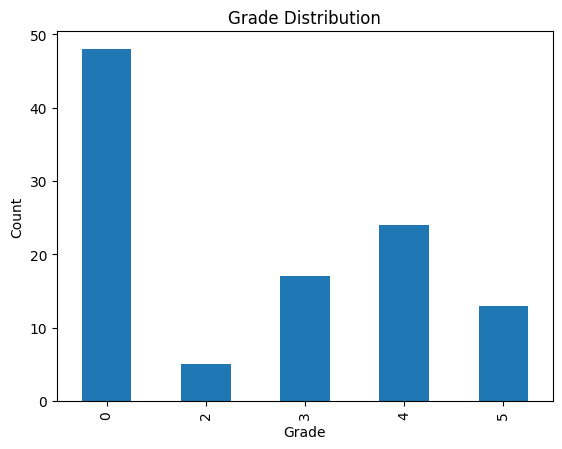

,count
Grade,
0,48
4,24
3,17
5,13
2,5


In [ ]:
#bar chart of grade distribution in order of grades 0-5
df_course['Grade'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
plt.show()

#count of each grade
df_course['Grade'].value_counts()

In [ ]:
#stats on all tasks and grade
df_course.median()

,0
Week2_Quiz1,3.33
Week3_MP1,12.00
Week3_PR1,5.00
Week5_MP2,10.87
Week5_PR2,5.00
Week7_MP3,15.91
Week7_PR3,2.50
Week4_Quiz2,3.17
Week6_Quiz3,4.00
Grade,3.00


In [ ]:
#stats on all tasks and grade
df_course.mean()

,0
Week2_Quiz1,2.406636
Week3_MP1,7.949626
Week3_PR1,2.803738
Week5_MP2,9.237757
Week5_PR2,2.844673
Week7_MP3,14.481869
Week7_PR3,2.383178
Week4_Quiz2,2.609439
Week6_Quiz3,2.663551
Grade,2.074766


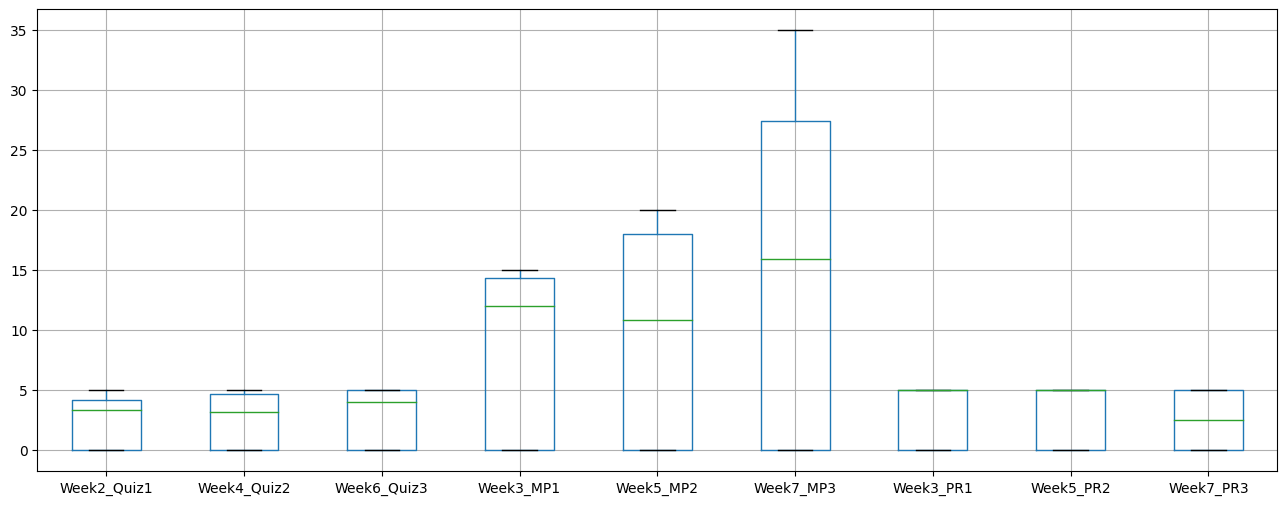

In [ ]:
plt.figure(figsize=(16, 6))
df_course.boxplot(column=['Week2_Quiz1', 'Week4_Quiz2', 'Week6_Quiz3', 'Week3_MP1', 'Week5_MP2', 'Week7_MP3', 'Week3_PR1', 'Week5_PR2', 'Week7_PR3'])
plt.show()

##Test Data Sets

Since there is no student who scored a 1 in the test, there is no possibility to train the models to predict the grade 1. I have set a random state.

In [ ]:
seed = 42 #I use the seeds 15, 42 and 70 in my paper

X = df_course.drop("Grade", axis=1)
y = df_course["Grade"]

#stratify to ensure distribution of grades in test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)


#distribution in y_test
y_test.value_counts()

,count
Grade,
0,10
4,5
5,3
3,3
2,1


In [ ]:
#distribution in y_train
y_train.value_counts()

,count
Grade,
0,38
4,19
3,14
5,10
2,4


#ML models - Mini projects, quizzes, peer reviews

##K-nearest neighbor

###Choose best K

I have chosen to use StratifiedKFold to choose the best K.

[Documentation](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html)

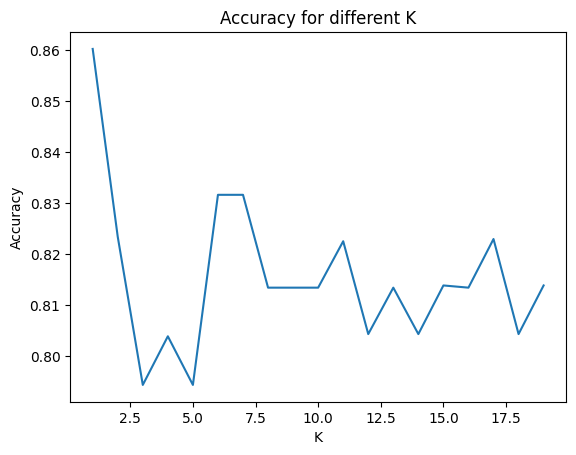

Best K: 1


In [ ]:
k_range = range(1, 20)
k_scores = []

skf = StratifiedKFold(n_splits=5)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy for different K')
plt.show()

# print K with best accuracy
optimal_k = k_range[np.argmax(k_scores)]
print("Best K:", optimal_k)


###KNN analysis

####One neighbor

In [ ]:
n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_1_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_1_accuracy)

Accuracy: 0.8181818181818182


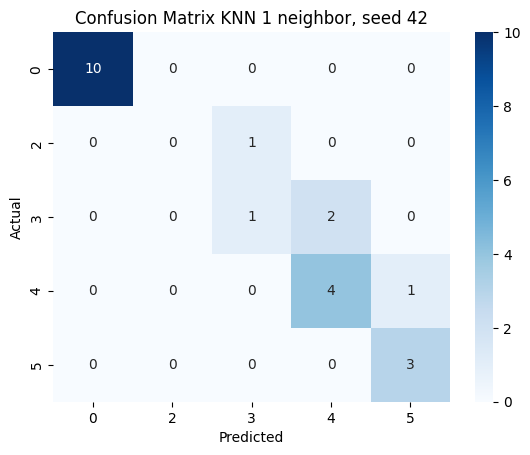

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix KNN 1 neighbor, seed {seed}')
plt.show()

####Seven neighbors

In [ ]:
n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_7_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_7_accuracy)

Accuracy: 0.9090909090909091


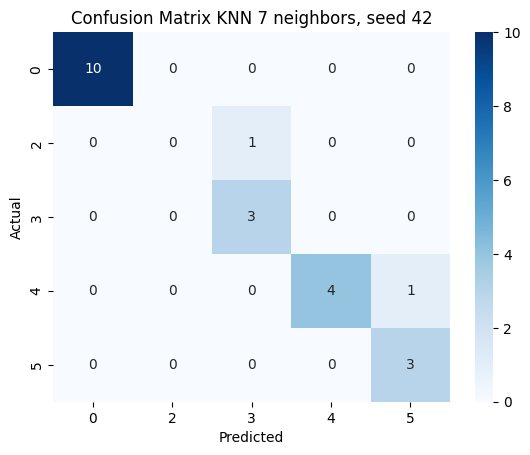

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix KNN 7 neighbors, seed {seed}')
plt.show()

As we increase the number of neighbors to seven, we can see that it among other things gets harder to predict the grade 2 accuratley. This might be correlated to the fact that grade 2 is not well represented in the data in comparison with other grades. As there are less than 5 grade 2's, it is likely to be classified with some grade 3's when comparing the seven closest neighbors.

##Random Forest

In [ ]:
# RandomForestClassifier object is created
rfc = RandomForestClassifier(n_estimators= 125, criterion="entropy")

# model is fitted to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=125)

In [ ]:
#accuracy score
#make predictions on the training data
Y_pred = rfc.predict(X_test)

#calculate the accuracy score
rf_accuracy = accuracy_score(y_test, Y_pred)

print("Accuracy:", rf_accuracy)

Accuracy: 0.9090909090909091


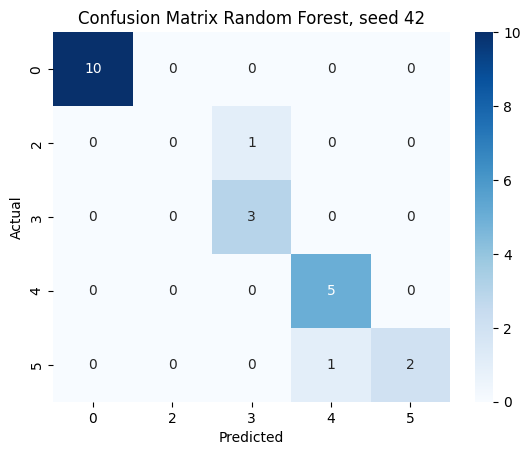

In [ ]:
confusion = confusion_matrix(y_test, Y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix Random Forest, seed {seed}')
plt.show()

In [ ]:
#important features
feature_importances_rfc = rfc.feature_importances_.flatten()
# create a df
feature_importances_df_rfc = pd.DataFrame(
    data={
        "feature": X.columns,
        "importance": feature_importances_rfc,
    }
)

# sort
feature_importances_df_rfc = feature_importances_df_rfc.sort_values(by="importance", ascending=False)

display(feature_importances_df_rfc)

,feature,importance
5,Week7_MP3,0.303734
3,Week5_MP2,0.184447
1,Week3_MP1,0.158806
7,Week4_Quiz2,0.095407
4,Week5_PR2,0.076569
6,Week7_PR3,0.057764
0,Week2_Quiz1,0.047883
2,Week3_PR1,0.044211
8,Week6_Quiz3,0.031179


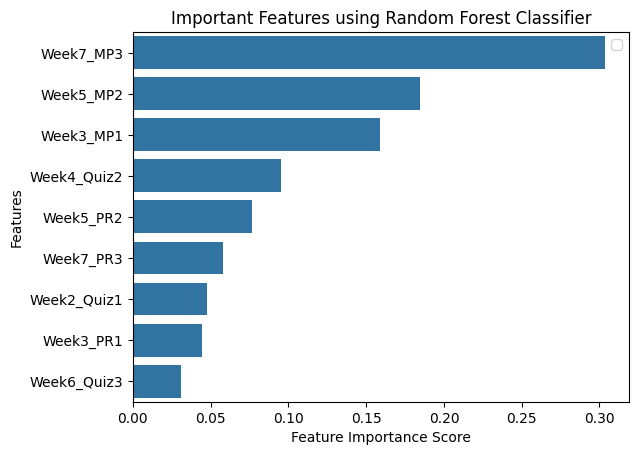

In [ ]:
#Creating a bar plot
sns.barplot(x = feature_importances_df_rfc.importance, y = feature_importances_df_rfc.feature)

#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features using Random Forest Classifier')
plt.legend()
plt.show()


##Model comparisons

In [ ]:
#values in table
accuracy_df = pd.DataFrame({
    'Model': ['KNN 1 neighbor', 'KNN 7 neighbors', 'Random Forest'],
    'Accuracy': [knn_1_accuracy, knn_7_accuracy, rf_accuracy]
})

# sort
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False)

accuracy_df_sorted

,Model,Accuracy
1,KNN 7 neighbors,0.909091
2,Random Forest,0.909091
0,KNN 1 neighbor,0.818182


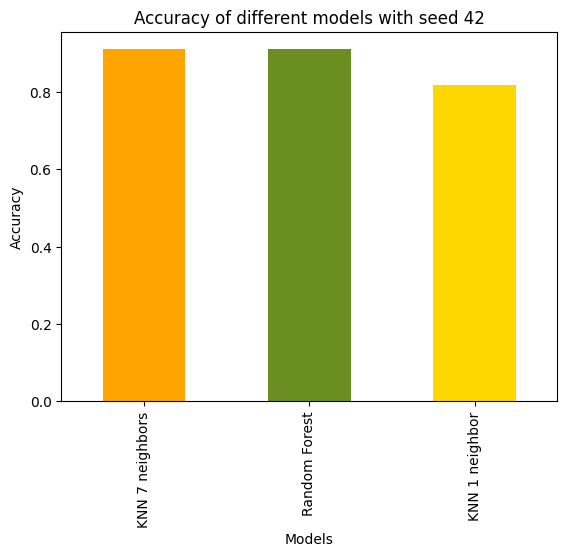

In [ ]:
model_colors = {
    'KNN 1 neighbor': 'gold',
    'KNN 7 neighbors': 'orange',
    'Random Forest': 'olivedrab'
}

colors = [model_colors[model] for model in accuracy_df_sorted['Model']]

accuracy_df_sorted.plot(
    kind='bar',
    x='Model',
    y='Accuracy',
    color=colors,
    legend=False,
    xlabel='Models',
    ylabel='Accuracy',
    title=f'Accuracy of different models with seed {seed}'
)

plt.show()